<a href="https://colab.research.google.com/github/aekgmla77/2024-2-DeepLearning/blob/main/VGGNet_CNN_%EB%AA%A8%EB%8D%B8_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST VGGNET

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models, losses, Model

mnist = tf.keras.datasets.mnist

# 가져온 mnist를 train과 test 데이터로 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 분리된 데이터를 rgb값 255로 나눠서 0과 1사이의 값으로 변경
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255

# 배열의 형상을 변경해서 차원 수를 3으로 설정
# # 전이학습 모델 input값 설정시 차원을 3으로 설정해줘야 함
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

# train, test 데이터 shape 확인
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 32, 32, 3) (60000,) (10000, 32, 32, 3) (10000,)


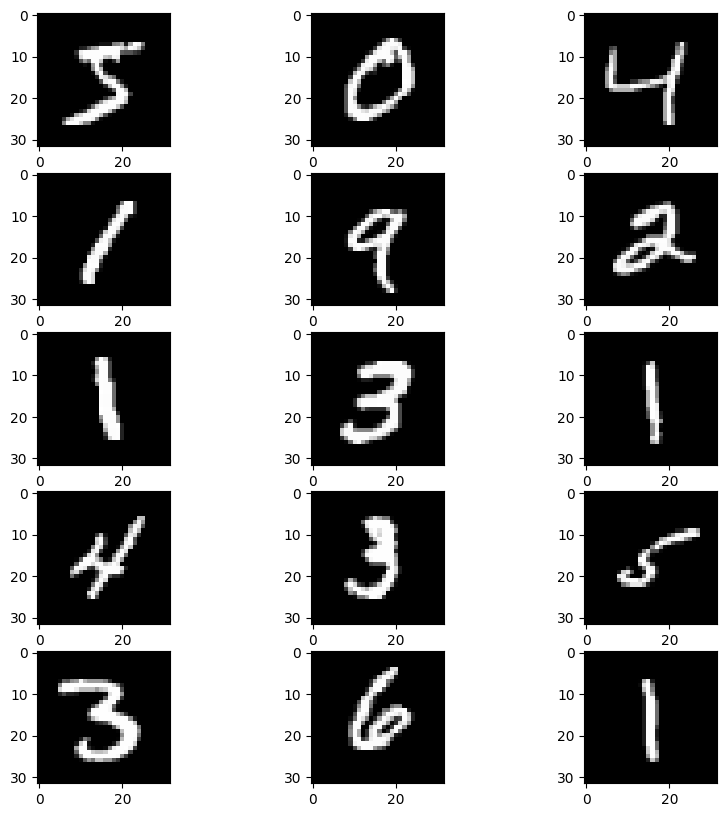

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [ ]:
import matplotlib.pyplot as plt

# train데이터와 label데이터가 정확한지 확인하기 위해 15개의 데이터를 시각화로 확인
# 문제 없음
plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1

plt.show()

print(y_train[:15])

In [ ]:
# 베이스라인 모델로 성능 검정을 위해 임의로 만들어보는 CNN모델
# Conv, Pooling 레이어를 추가한 후 Dense 레이어가 들어간 일반적인 모델

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저(optimizer)와 손실함수(loss)를 설정하고 정확도 매트릭스가 나오게 컴파일
# optimizer -> 'adam'
# loss -> sparse_categorical_crossentropy

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델의 모습을 표로 출력
model.summary()

# 위의 레이어를 가진 모델로 5번 학습시킴
print(model.fit(x_train, y_train, epochs=5))

# 검증을 해봄
print(model.evaluate(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,384,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,407,178 (5.37 MB)

 Trainable params: 1,407,178 (5.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8611 - loss: 0.4550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9609 - loss: 0.1446
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9688 - loss: 0.1135
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9746 - loss: 0.0925
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9782 - loss: 0.0794
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9791 - loss: 0.0726
[0.060038719326257706, 0.9836999773979187]


In [ ]:
# VGGNet 구조로 CNN모델 구현
model_vgg = tf.keras.models.Sequential([

    # 첫번째 convolution
    # conv(filters = 64) -> conv(filters = 64) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(input_shape=(32, 32, 1), kernel_size=3,padding="same", filters=64),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 두번째 convolution
    # conv(filters = 128) -> conv(filters = 128) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=128),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=128),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 데이터의 차원을 변환하기 위해 flatten진행
    tf.keras.layers.Flatten(),

    # vgg알고리즘에 layer를 추가
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1000, activation='relu'),
    # tf.keras.layers.Dropout(0.5),

    # 타겟 class가 10이기 때문에 출력 라벨값도 10으로 고정
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
# optimizer -> 'adam'
# loss -> sparse_categorical_crossentropy
model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델의 모습을 표로 출력
model_vgg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,924,546 (144.67 MB)

 Trainable params: 37,924,546 (144.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# VGGNet 구조로 CNN 모델 구현
model_vgg = tf.keras.models.Sequential([
    # 첫 번째 convolution
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), kernel_size=3, padding="same", filters=64),
    tf.keras.layers.Conv2D(kernel_size=3, padding="same", filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same", strides=(2, 2)),

    # 두 번째 convolution
    tf.keras.layers.Conv2D(kernel_size=3, padding="same", filters=128),
    tf.keras.layers.Conv2D(kernel_size=3, padding="same", filters=128),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="same", strides=(2, 2)),

    # 데이터의 차원을 변환하기 위해 flatten 진행
    tf.keras.layers.Flatten(),

    # vgg 알고리즘에 layer를 추가
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
    # 타겟 class가 10이므로 출력 라벨도 10으로 고정
])

# 모델을 컴파일
model_vgg.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델의 요약 출력
model_vgg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1000)                │       4,097,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,925,698 (144.68 MB)

 Trainable params: 37,925,698 (144.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 과적합으로 loss가 올라가면 멈추도록 earlystop기능 사용
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 위의 레이어를 가진 VGGNet모델로 5번 학습시킴
print(model_vgg.fit(x_train, y_train, batch_size = 100, epochs=10,verbose=1, callbacks=[callback], validation_data=(x_test, y_test)))

# test데이터로 검증을 해봄
print(model_vgg.evaluate(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8992 - loss: 0.3226 - val_accuracy: 0.9797 - val_loss: 0.0620
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.9802 - loss: 0.0679 - val_accuracy: 0.9805 - val_loss: 0.0612
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9825 - loss: 0.0597 - val_accuracy: 0.9840 - val_loss: 0.0498
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9845 - loss: 0.0556 - val_accuracy: 0.9856 - val_loss: 0.0476
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9847 - loss: 0.0554 - val_accuracy: 0.9846 - val_loss: 0.0605
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9870 - loss: 0.0501 - val_accuracy: 0.9841 - val_loss: 0.0554
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.9862 - loss: 0.0493 - val_accuracy: 0.9814 - val_loss: 0.0869
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9861 - loss: 0.0556 - 

In [ ]:
# VGG16 구조로 CNN모델 구현
model_vgg = tf.keras.models.Sequential([

    # 첫번째 convolution
    # conv(filters = 64) -> conv(filters = 64) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(input_shape=(32, 32, 3), kernel_size=3,padding="same", filters=64),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 두번째 convolution
    # conv(filters = 128) -> conv(filters = 128) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=128),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=128),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 두번째 convolution
    # conv(filters = 256) -> conv(filters = 256) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=256),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=256),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=256),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 두번째 convolution
    # conv(filters = 512) -> conv(filters = 512) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),

    # 두번째 convolution
    # conv(filters = 512) -> conv(filters = 512) -> fool(pool_size = 2)
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.Conv2D(kernel_size=3,padding="same", filters=512),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="same", strides=(2,2)),


    # 데이터의 차원을 변환하기 위해 flatten진행
    tf.keras.layers.Flatten(),

    # vgg알고리즘에 layer를 추가
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1000, activation='relu'),
    # tf.keras.layers.Dropout(0.5),

    # 타겟 class가 10이기 때문에 출력 라벨값도 10으로 고정
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
# optimizer -> 'adam'
# loss -> sparse_categorical_crossentropy
model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델의 모습을 표로 출력
model_vgg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,922,946 (79.81 MB)

 Trainable params: 20,922,946 (79.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 과적합으로 loss가 올라가면 멈추도록 earlystop기능 사용
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# 위의 레이어를 가진 VGGNet모델로 5번 학습시킴
print(model_vgg.fit(x_train, y_train, batch_size = 100, epochs=10,verbose=1, callbacks=[callback], validation_data=(x_test, y_test)))

# test데이터로 검증을 해봄
print(model_vgg.evaluate(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.3766 - loss: 7.2129 - val_accuracy: 0.9466 - val_loss: 0.1929
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 76s 62ms/step - accuracy: 0.9438 - loss: 0.1917 - val_accuracy: 0.9786 - val_loss: 0.0703
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9713 - loss: 0.0981 - val_accuracy: 0.9829 - val_loss: 0.0590
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9823 - loss: 0.0612 - val_accuracy: 0.9858 - val_loss: 0.0467
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9848 - val_loss: 0.0592
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.9802 - loss: 0.0724 - val_accuracy: 0.9874 - val_loss: 0.0450
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9816 - loss: 0.0680 - val_accuracy: 0.9817 - val_loss: 0.0765
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9741 - loss: 0.1035 - 